In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/binal/OneDrive/Documents/DS projects/NYC Taxi trip/train.zip")
df.shape

(1458644, 11)

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<AxesSubplot:>

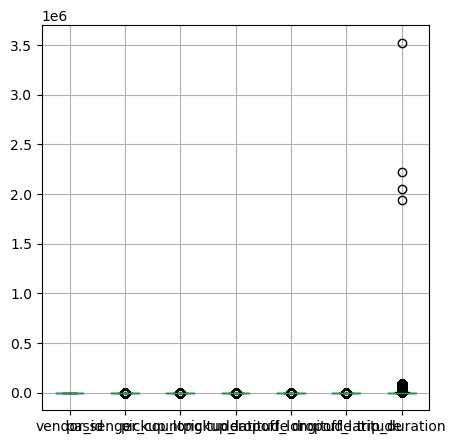

In [7]:
df.boxplot(figsize=(5,5))

Dataframe updated with trip duration of less than 4 hours and at least 1 pick up point

In [8]:
df=df[df['trip_duration']<14400]
df=df[df['passenger_count']>0]


This code defines a function called haversine_distance that calculates the distance between two points on the Earth's surface, given their latitude and longitude coordinates.

In [9]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(row):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
    lat2, lon2 = radians(row['dropoff_latitude']), radians(row['dropoff_longitude'])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    radius_of_earth = 6371  # Earth's radius in kilometers
    distance = radius_of_earth * c

    return distance

df['distance'] = df.apply(haversine_distance, axis=1)

In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['rush_nonrush'] = df['pickup_datetime'].dt.hour.apply(lambda x: 'rush' if 7 <= x < 19 else 'nonrush')
df['weekday_weekend'] = df['pickup_datetime'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')

df_encoded = pd.get_dummies(df, columns=['rush_nonrush', 'weekday_weekend'])

In [11]:
df_encoded['rush_nonrush'] = df_encoded['rush_nonrush_rush'].astype(int)
df_encoded['weekday_weekend'] = df_encoded['weekday_weekend_weekday'].astype(int)
df_encoded = df_encoded.drop(['rush_nonrush_rush', 'rush_nonrush_nonrush', 'weekday_weekend_weekday', 'weekday_weekend_weekend'], axis=1)

In [12]:
df_encoded.drop(columns=['vendor_id','id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], inplace=True, axis=1)
df_encoded.head()

,passenger_count,trip_duration,distance,rush_nonrush,weekday_weekend
0,1,455,1.498521,1,1
1,1,663,1.805507,0,0
2,1,2124,6.385098,1,1
3,1,429,1.485498,0,1
4,1,435,1.188588,1,0


In [13]:
df = df[df['distance']<200]

In [14]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'id' has 1456497 unique value(s).
Column 'vendor_id' has 2 unique value(s).
Column 'pickup_datetime' has 1378292 unique value(s).
Column 'dropoff_datetime' has 1378519 unique value(s).
Column 'passenger_count' has 9 unique value(s).
Column 'pickup_longitude' has 23025 unique value(s).
Column 'pickup_latitude' has 45219 unique value(s).
Column 'dropoff_longitude' has 33790 unique value(s).
Column 'dropoff_latitude' has 62483 unique value(s).
Column 'store_and_fwd_flag' has 2 unique value(s).
Column 'trip_duration' has 6089 unique value(s).
Column 'distance' has 1450157 unique value(s).
Column 'rush_nonrush' has 2 unique value(s).
Column 'weekday_weekend' has 2 unique value(s).


In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,rush_nonrush,weekday_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521,rush,weekday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507,nonrush,weekend
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098,rush,weekday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498,nonrush,weekday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588,rush,weekend


PREPROCESSING DATA

In [16]:
X = df_encoded.drop(columns=['trip_duration'])
y = df_encoded[['trip_duration']]

In [17]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable

# Splitting X and y into training and testing sets (using 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1165206, 4)
X_test shape: (291302, 4)
y_train shape: (1165206, 1)
y_test shape: (291302, 1)


MODELLING

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

param = {'objective': 'reg:squarederror', 'eval_metric': 'rmse','max_depth':5,'learning_rate':0.1,'subsample':0.8,'colsample_bytree':0.8,'n_estimators':100}

num_round = 10
model = xgb.train(param, dtrain, num_round)

[19:40:05] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [19]:
predictions=model.predict(dtest)

In [20]:
print(predictions)

[372.63202 244.11963 282.7046  ... 392.14328 707.594   414.0358 ]


In [22]:
mse=mean_squared_error(y_test,predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 298126.2409048279


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 546.0093780374361


In [25]:
df1 = pd.read_csv("C:/Users/binal/OneDrive/Documents/DS projects/NYC Taxi trip/test.zip")
df1.head()
df1.shape

(625134, 9)

In [26]:
df1.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [27]:
df1.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [29]:
from math import radians, sin, cos, sqrt, atan2
def haversine_distance(row):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
    lat2, lon2 = radians(row['dropoff_latitude']), radians(row['dropoff_longitude'])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    radius_of_earth = 6371  # Earth's radius in kilometers
    distance = radius_of_earth * c

    return distance

df1['distance'] = df1.apply(haversine_distance, axis=1)

In [30]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])
df1['rush_nonrush'] = df1['pickup_datetime'].dt.hour.apply(lambda x: 'rush' if 7 <= x < 19 else 'nonrush')
df1['weekday_weekend'] = df1['pickup_datetime'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')

df1_encoded = pd.get_dummies(df1, columns=['rush_nonrush', 'weekday_weekend'])

In [31]:
df1_encoded['rush_nonrush'] = df1_encoded['rush_nonrush_rush'].astype(int)
df1_encoded['weekday_weekend'] = df1_encoded['weekday_weekend_weekday'].astype(int)
df1_encoded = df1_encoded.drop(['rush_nonrush_rush', 'rush_nonrush_nonrush', 'weekday_weekend_weekday', 'weekday_weekend_weekend'], axis=1)

In [32]:
df1_encoded.drop(columns=['vendor_id','pickup_datetime','store_and_fwd_flag','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], inplace=True, axis=1)
df1_encoded.head()

,id,passenger_count,distance,rush_nonrush,weekday_weekend
0,id3004672,1,2.746426,0,1
1,id3505355,1,2.759239,0,1
2,id1217141,1,1.306155,0,1
3,id2150126,1,5.269088,0,1
4,id1598245,1,0.960842,0,1


In [33]:
for column in df1.columns:
    unique_values = df1[column].nunique()
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'id' has 625134 unique value(s).
Column 'vendor_id' has 2 unique value(s).
Column 'pickup_datetime' has 610581 unique value(s).
Column 'passenger_count' has 8 unique value(s).
Column 'pickup_longitude' has 18926 unique value(s).
Column 'pickup_latitude' has 38408 unique value(s).
Column 'dropoff_longitude' has 26476 unique value(s).
Column 'dropoff_latitude' has 51439 unique value(s).
Column 'store_and_fwd_flag' has 2 unique value(s).
Column 'distance' has 622478 unique value(s).
Column 'rush_nonrush' has 2 unique value(s).
Column 'weekday_weekend' has 2 unique value(s).


In [34]:
Xt=df1_encoded.drop(columns=['id']) 

In [35]:
print(Xt)

        passenger_count   distance  rush_nonrush  weekday_weekend
0                     1   2.746426             0                1
1                     1   2.759239             0                1
2                     1   1.306155             0                1
3                     1   5.269088             0                1
4                     1   0.960842             0                1
...                 ...        ...           ...              ...
625129                1   0.967438             0                1
625130                1   6.196343             0                1
625131                2   8.153719             0                1
625132                1  20.380748             0                1
625133                2   5.932019             0                1

[625134 rows x 4 columns]


In [36]:
dtest1 = xgb.DMatrix(Xt)

In [37]:
predictions1=model.predict(dtest1)
print(predictions)

[372.63202 244.11963 282.7046  ... 392.14328 707.594   414.0358 ]


In [38]:
dfhasil = df1_encoded
dfhasil.drop(columns=['distance','passenger_count','rush_nonrush','weekday_weekend'], inplace=True, axis=1)
dfhasil['trip_duration'] = predictions1

dfhasil.head()

,id,trip_duration
0,id3004672,495.802094
1,id3505355,495.802094
2,id1217141,322.095947
3,id2150126,693.547485
4,id1598245,276.462524


In [39]:
dfhasil.to_csv('submission.csv',index=False)